In [36]:
%matplotlib inline
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import *

## Introduction
With Spik3 the goal is to find a 3 qubit Quantum Circuit that has 3 outcomes with 1/3 probability each.

OR(x,y) = Toffoli(1,y,Toffoli(x,y,x))

You can do it with just one Toffoli gate, using De Morgan's law x₀ ∨ x₁ = ¬ (¬x₀ ∧ ¬x₁), as follows:

Apply an X gate to each of the input qubits:
|x₀⟩⊗|x₁⟩⊗|y⟩ → |¬x₀⟩⊗|¬x₁⟩⊗|y⟩
Apply a Toffoli gate with two input qubits as controls and the output qubit as target:
|¬x₀⟩⊗|¬x₁⟩⊗|y⟩ → |¬x₀⟩⊗|¬x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩
Apply an X gate to each of the input qubits again to return them to their initial state:
|¬x₀⟩⊗|¬x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩ → |x₀⟩⊗|x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩
Apply an X gate to the output qubit to negate the result:
|x₀⟩⊗|x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩ → |x₀⟩⊗|x₁⟩⊗|y ⊕ ¬(¬x₀ ∧ ¬x₁)⟩ = |x₀⟩⊗|x₁⟩⊗|y ⊕ (x₀ ∨ x₁)⟩

https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html

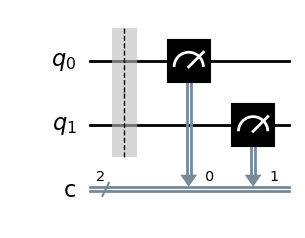

In [154]:
circ1 = QuantumCircuit(2,2)
# spike1 solution
circ1.barrier(range(2))
circ1.measure(range(2),range(2))
circ1.draw(output='mpl')

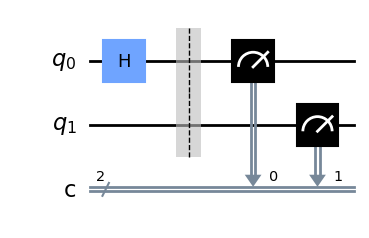

In [155]:
circ2 = QuantumCircuit(2,2)
# spike2 solution
circ2.h(0)
circ2.barrier(range(2))
circ2.measure(range(2),range(2))
circ2.draw(output='mpl')

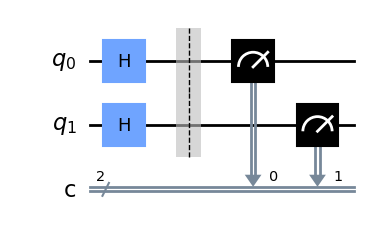

In [156]:
circ4 = QuantumCircuit(2,2)
# spike4 solution
circ4.h(range(2))
circ4.barrier(range(2))
circ4.measure(range(2),range(2))
circ4.draw(output='mpl')

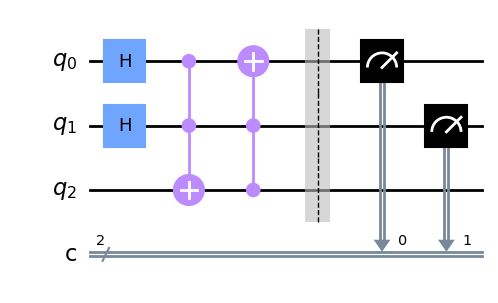

In [157]:
circ3 = QuantumCircuit(3,2)
# spike3 solution: https://qiskit.org/textbook/ch-states/representing-qubit-states.html

#Apply an X gate to each of the input qubits:
#|x₀⟩⊗|x₁⟩⊗|y⟩ → |¬x₀⟩⊗|¬x₁⟩⊗|y⟩
#Apply a Toffoli gate with two input qubits as controls and the output qubit as target:
#|¬x₀⟩⊗|¬x₁⟩⊗|y⟩ → |¬x₀⟩⊗|¬x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩
#Apply an X gate to each of the input qubits again to return them to their initial state:
#|¬x₀⟩⊗|¬x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩ → |x₀⟩⊗|x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩
#Apply an X gate to the output qubit to negate the result:
#|x₀⟩⊗|x₁⟩⊗|y ⊕ (¬x₀ ∧ ¬x₁)⟩ → |x₀⟩⊗|x₁⟩⊗|y ⊕ ¬(¬x₀ ∧ ¬x₁)⟩ = |x₀⟩⊗|x₁⟩⊗|y ⊕ (x₀ ∨ x₁)⟩

circ3.h(range(2))
circ3.ccx(0,1,2)
circ3.ccx(2,1,0)
circ3.barrier(range(3))
circ3.measure(range(2),range(2))
circ3.draw(output='mpl')

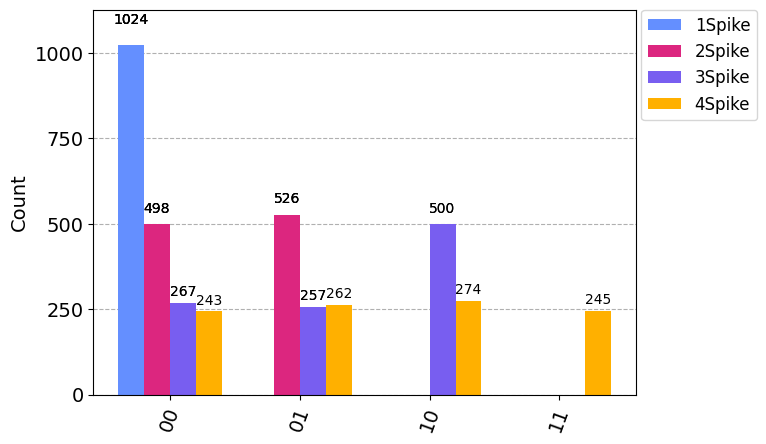

In [158]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
job1 = execute(circ1, backend_sim, shots=1024)
job2 = execute(circ2, backend_sim, shots=1024)
job3 = execute(circ3, backend_sim, shots=1024)
job4 = execute(circ4, backend_sim, shots=1024)

# Grab the results from the job.
result1 = job1.result()
counts1 = result1.get_counts(circ1)

result2 = job2.result()
counts2 = result2.get_counts(circ2)

result3 = job3.result()
counts3 = result3.get_counts(circ3)

result4 = job4.result()
counts4 = result4.get_counts(circ4)

plot_histogram([counts1, counts2, counts3, counts4], legend=['1Spike', '2Spike', '3Spike', '4Spike'])